In [4]:
import pandas as pd
import numpy as np

In [2]:
[1,2,3,4] * 5

[1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4]

In [5]:
np.array([1,2,3,4])*5

array([ 5, 10, 15, 20])

In [6]:
np.multiply([1,2,3,4], 5)

array([ 5, 10, 15, 20])

In [7]:
# np.random.binomial

In [12]:
def coin_flip(n):
    return np.random.binomial(
        n, # trials (flips)
         1/6# prob of success (heads)
        )

[coin_flip(3) for _ in range(5)] #simulation of outcomes

[1, 0, 2, 0, 1]

#Boolean masks

In [13]:
series = pd.Series([1,2,3,4,5])
mask = [True, False, True, False, True]
series[mask]

0    1
2    3
4    5
dtype: int64

# BAYES' Theorem

Suppose we have 3 jars with 100 marbles in each.

- Jar 1 has 40 blue marbles, 30 red marbles, and 30 green marbles.
- Jar 2 has 60 blue marbles, 20 red marbles, and 20 green marbles.
- Jar 3 has 10 blue marbles, 30 red marbles, and 60 green marbles.


You pick a marble from one of the jars at random, and the marble is green. What are the probabilities that the marble came from each of the three jars?

In [14]:
def bayes_theorem(priors: list, likelihoods: list) -> np.array: #list lits, should return an array
    priors_x_likelihoods = np.multiply(priors, likelihoods)
    marginal_prob = sum(priors_x_likelihoods)
    return priors_x_likelihoods / marginal_prob # posterior probabilities

In [19]:
jars = [1/3, 1/3, 1/3] # probability of selecting each jar
greens = [.3, .2, .6] #probability of selecting a green from each jar 

bayes_theorem(jars, greens)

array([0.27272727, 0.18181818, 0.54545455])

Probabilities

- Jar 1: 27%
- Jar 2: 18.18%
- Jar 3 54.5

# Bayesian inference

Suppose we have just launched an online store, and we are trying to estimate what % of visitors to our online store will make a purchase.

1st day, 50 people visited our site  and 10 of them made a purchase, We can use this to predict average future sales:

In [25]:
n = 50 # total observations
k = 10 # successful observations

def posterior_dist(k, n, size = 100000): #
    prior = pd.Series(np.random.uniform(0, 1, size = size))
    outcomes = [np.random.binomial(n, p) for p in prior]
    return prior[[x == k for x in outcomes]]

posterior = posterior_dist(k, n)
posterior.describe()  

#based on the estimulations the 20% (mean) people will buy something

count    1928.000000
mean        0.209995
std         0.055656
min         0.067987
25%         0.167973
50%         0.207396
75%         0.248033
max         0.417793
dtype: float64

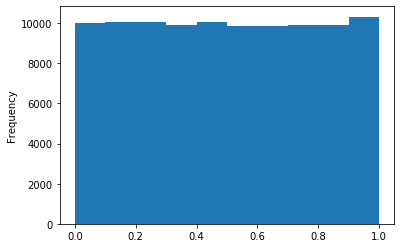

In [23]:
pd.Series(np.random.uniform(0, 1, size = 100000)).plot(kind = 'hist')

In [26]:
posterior

55       0.165271
67       0.229875
138      0.279169
186      0.240920
253      0.180884
270      0.332503
286      0.258772
340      0.097310
407      0.194959
411      0.266215
466      0.161110
499      0.183972
600      0.292417
632      0.358976
659      0.155265
678      0.134821
742      0.183230
870      0.253986
898      0.153117
930      0.173975
1017     0.278564
1021     0.330185
1043     0.174365
1055     0.255969
1155     0.265435
1284     0.239762
1312     0.163718
1481     0.187130
1552     0.119019
1618     0.299990
           ...   
98440    0.200816
98449    0.145027
98452    0.168456
98460    0.221194
98548    0.195114
98574    0.227951
98581    0.218532
98588    0.168786
98781    0.160304
98881    0.204597
98899    0.324855
99170    0.242183
99179    0.155858
99233    0.184080
99287    0.152828
99302    0.253416
99347    0.106362
99438    0.098559
99467    0.183137
99503    0.091175
99572    0.226736
99573    0.212370
99574    0.148701
99738    0.207712
99753    0

# Confidence Interval

In [27]:
from scipy.stats import sem, t

def conf_interval(sample, confidence):
    return t.interval(
    confidence, #confidence level
    len(sample) - 1, #degrees of freedom
    loc = sample.mean(),
    scale = sem(sample)
    )

conf_interval(posterior, .95)

(0.20750874286808246, 0.2124805184257071)

# Maximum likelihood estimate MLE

In [28]:
def mle(arr): #maximum likelihood estimate
    rounded = arr.round(2)
    mode = rounded.mode()[0]
    prob = list(rounded).count(mode) / len(rounded)
    return mode, prob

mle(posterior) # 1 number is MLE which is the mean , then the prob that it will be exactly .2 within the distribution

(0.21, 0.07520746887966805)